<a href="https://colab.research.google.com/github/dm2144/F28WP-lab/blob/main/Lifestyle_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.__version__

'2.2.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
import kagglehub

# Download dataset
path = kagglehub.dataset_download("alphiree/cardiovascular-diseases-risk-prediction-dataset")
print("Path to dataset:", path)
print("Files:", os.listdir(path))

# Find and load CSV
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_path = os.path.join(path, csv_files[0])
df = pd.read_csv(csv_path)



100%|██████████| 4.87M/4.87M [00:00<00:00, 5.45MB/s]

Extracting files...


Path to dataset: /root/.cache/kagglehub/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset/versions/3
Files: ['CVD_cleaned.csv']


In [ ]:
# Load datasett
df = pd.read_csv('/content/drive/MyDrive/F21DL_Group/CVD_lifestyle_factors.csv')

In [3]:
#Peek at the data (first few rows)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.duplicated().sum()

np.int64(80)

In [ ]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
308849    False
308850    False
308851    False
308852    False
308853    False
Length: 308854, dtype: bool


In [ ]:
#Get info about columns, data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
#Check the shape (rows, columns)
df.shape

(308854, 19)

In [ ]:
#Check for missing/null values
df.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


In [ ]:
#Check for duplicated rows - HAS DUPLICATES?
df.duplicated().sum()

np.int64(80)

In [ ]:
#Get summary stats of numeric columns
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [ ]:
#Some could be renamed
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
#Drop Checkup column
df = df.drop('Checkup', axis=1)

In [ ]:
df.columns


Index(['General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
df.head()

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df_clean = df.drop_duplicates()
print(df_clean)

       General_Health Exercise Heart_Disease Skin_Cancer Other_Cancer  \
0                Poor       No            No          No           No   
1           Very Good       No           Yes          No           No   
2           Very Good      Yes            No          No           No   
3                Poor      Yes           Yes          No           No   
4                Good       No            No          No           No   
...               ...      ...           ...         ...          ...   
308849      Very Good      Yes            No          No           No   
308850           Fair      Yes            No          No           No   
308851      Very Good      Yes            No          No           No   
308852      Very Good      Yes            No          No           No   
308853      Excellent      Yes            No          No           No   

       Depression                                    Diabetes Arthritis  \
0              No                               

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
for col in df_clean.columns:
    print(f"Column: {col}")
    print(df_clean[col].unique())
    print("-"*50)


Column: General_Health
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
--------------------------------------------------
Column: Exercise
['No' 'Yes']
--------------------------------------------------
Column: Heart_Disease
['No' 'Yes']
--------------------------------------------------
Column: Skin_Cancer
['No' 'Yes']
--------------------------------------------------
Column: Other_Cancer
['No' 'Yes']
--------------------------------------------------
Column: Depression
['No' 'Yes']
--------------------------------------------------
Column: Diabetes
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
--------------------------------------------------
Column: Arthritis
['Yes' 'No']
--------------------------------------------------
Column: Sex
['Female' 'Male']
--------------------------------------------------
Column: Age_Category
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
--

In [ ]:
exceptions = df_clean[
    (df_clean['Diabetes'] == 'No, pre-diabetes or borderline diabetes') |
    (df_clean['Diabetes'] == 'Yes, but female told only during pregnancy')
]

print(exceptions)


       General_Health Exercise Heart_Disease Skin_Cancer Other_Cancer  \
26               Fair       No            No          No           No   
30          Very Good       No            No          No           No   
49               Poor      Yes            No         Yes           No   
54          Very Good       No            No         Yes           No   
84               Fair      Yes            No          No           No   
...               ...      ...           ...         ...          ...   
308758      Very Good       No            No          No           No   
308804           Good      Yes            No          No           No   
308827           Fair      Yes            No          No           No   
308833      Very Good      Yes            No          No           No   
308851      Very Good      Yes            No          No           No   

       Depression                                    Diabetes Arthritis  \
26             No     No, pre-diabetes or border

In [ ]:
print(exceptions['Diabetes'].value_counts())


Diabetes
No, pre-diabetes or borderline diabetes       6896
Yes, but female told only during pregnancy    2646
Name: count, dtype: int64


In [ ]:
replacements = {
    'No, pre-diabetes or borderline diabetes': 'No',
    'Yes, but female told only during pregnancy': 'Yes'
}

df_clean['Diabetes'] = df_clean['Diabetes'].replace(replacements)

print(df_clean['Diabetes'].value_counts())


Diabetes
No     265908
Yes     42815
Name: count, dtype: int64


/tmp/ipython-input-284843513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Diabetes'] = df_clean['Diabetes'].replace(replacements)


In [ ]:
df_clean.loc[:, 'Diabetes'] = df_clean['Diabetes'].replace(replacements)

In [ ]:
print(df_clean['Diabetes'].value_counts())

Diabetes
No     265908
Yes     42815
Name: count, dtype: int64


In [ ]:
df_clean.shape

(308723, 18)

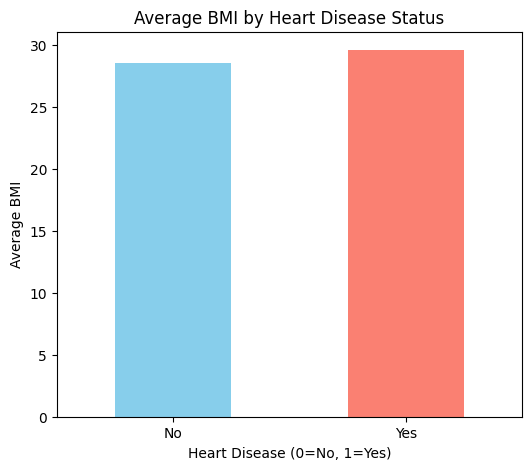

In [ ]:
import matplotlib.pyplot as plt

# Average BMI by Heart Disease
mean_bmi = df.groupby("Heart_Disease")["BMI"].mean()

plt.figure(figsize=(6,5))
mean_bmi.plot(kind="bar", color=["skyblue", "salmon"])
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Average BMI")
plt.title("Average BMI by Heart Disease Status")
plt.xticks(rotation=0)
plt.show()


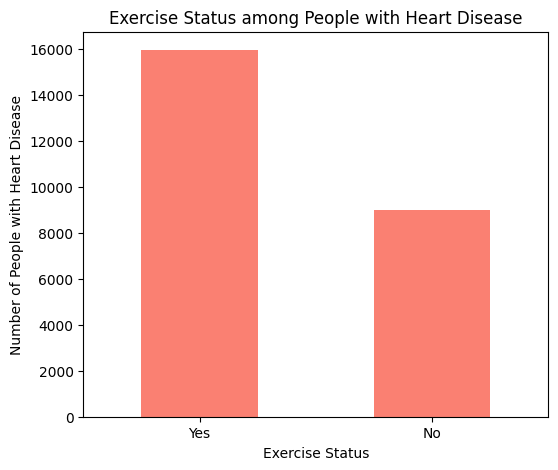

In [ ]:
import matplotlib.pyplot as plt

# Filter only people with Heart Disease
hd_df = df[df["Heart_Disease"] == "Yes"]  # or 1 if your column is numeric

# Count of Exercise status among them
exercise_counts = hd_df["Exercise"].value_counts()

# Plot
plt.figure(figsize=(6,5))
exercise_counts.plot(kind="bar", color="salmon")
plt.xlabel("Exercise Status")
plt.ylabel("Number of People with Heart Disease")
plt.title("Exercise Status among People with Heart Disease")
plt.xticks(rotation=0)
plt.show()

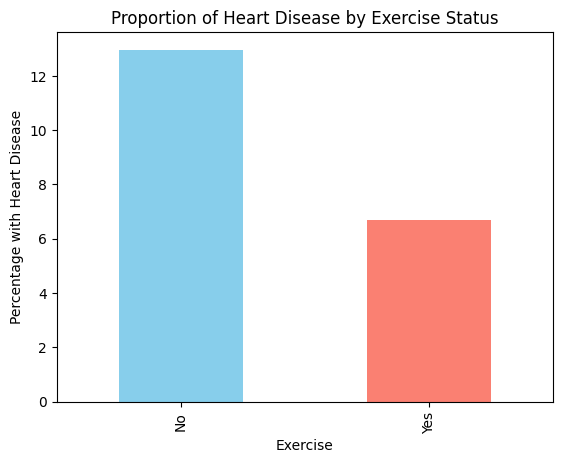

In [ ]:
#FINAL
exercise_hd_prop = df.groupby("Exercise")["Heart_Disease"].value_counts(normalize=True).unstack()["Yes"] * 100
exercise_hd_prop.plot(kind="bar", color=["skyblue", "salmon"])
plt.ylabel("Percentage with Heart Disease")
plt.title("Proportion of Heart Disease by Exercise Status")
plt.show()

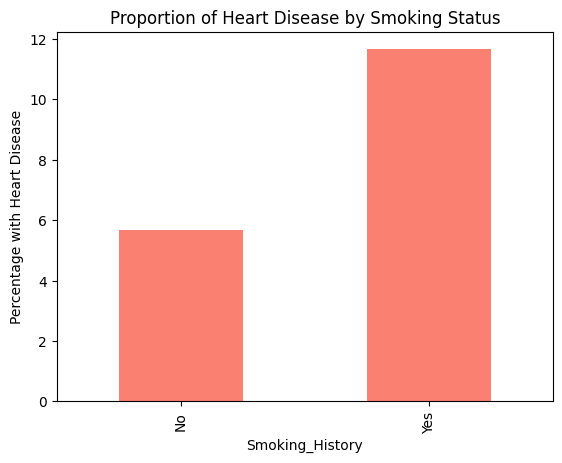

In [ ]:
#FINAL
smoking_hd_prop = df_clean.groupby("Smoking_History")["Heart_Disease"].value_counts(normalize=True).unstack()["Yes"] * 100

smoking_hd_prop.plot(kind="bar", color="salmon")
plt.ylabel("Percentage with Heart Disease")
plt.title("Proportion of Heart Disease by Smoking Status")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Exercise                      308854 non-null  object 
 2   Heart_Disease                 308854 non-null  object 
 3   Skin_Cancer                   308854 non-null  object 
 4   Other_Cancer                  308854 non-null  object 
 5   Depression                    308854 non-null  object 
 6   Diabetes                      308854 non-null  object 
 7   Arthritis                     308854 non-null  object 
 8   Sex                           308854 non-null  object 
 9   Age_Category                  308854 non-null  object 
 10  Height_(cm)                   308854 non-null  float64
 11  Weight_(kg)                   308854 non-null  float64
 12  BMI                           308854 non-nul

In [ ]:
df.head(5)

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


  Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

df['CVD'] = df['Heart_Disease'].apply(lambda x: 1 if x == 'Yes' else 0)
df = df.drop(columns=['Heart_Disease'])

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['CVD'])
y = df['CVD']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_res, y_train_res)


y_prob = model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

# 10️⃣ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6378902835187843

Confusion Matrix:
 [[53981 31185]
 [ 2367  5124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.63      0.76     85166
           1       0.14      0.68      0.23      7491

    accuracy                           0.64     92657
   macro avg       0.55      0.66      0.50     92657
weighted avg       0.89      0.64      0.72     92657



KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Try different k values
k_values = range(1, 21)  # from 1 to 20 neighbors
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation on resampled training data
    scores = cross_val_score(knn, X_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k with the highest accuracy
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k} with CV Accuracy: {cv_scores[np.argmax(cv_scores)]:.3f}")

# Train final model with best k on resampled training data
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_res, y_train_res)
y_pred_best = knn_best.predict(X_test)

# Evaluate on scaled test data
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nAccuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

DECISION TREES

In [ ]:
print(df.columns.tolist())


['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


Decision Tree Accuracy: 0.9189


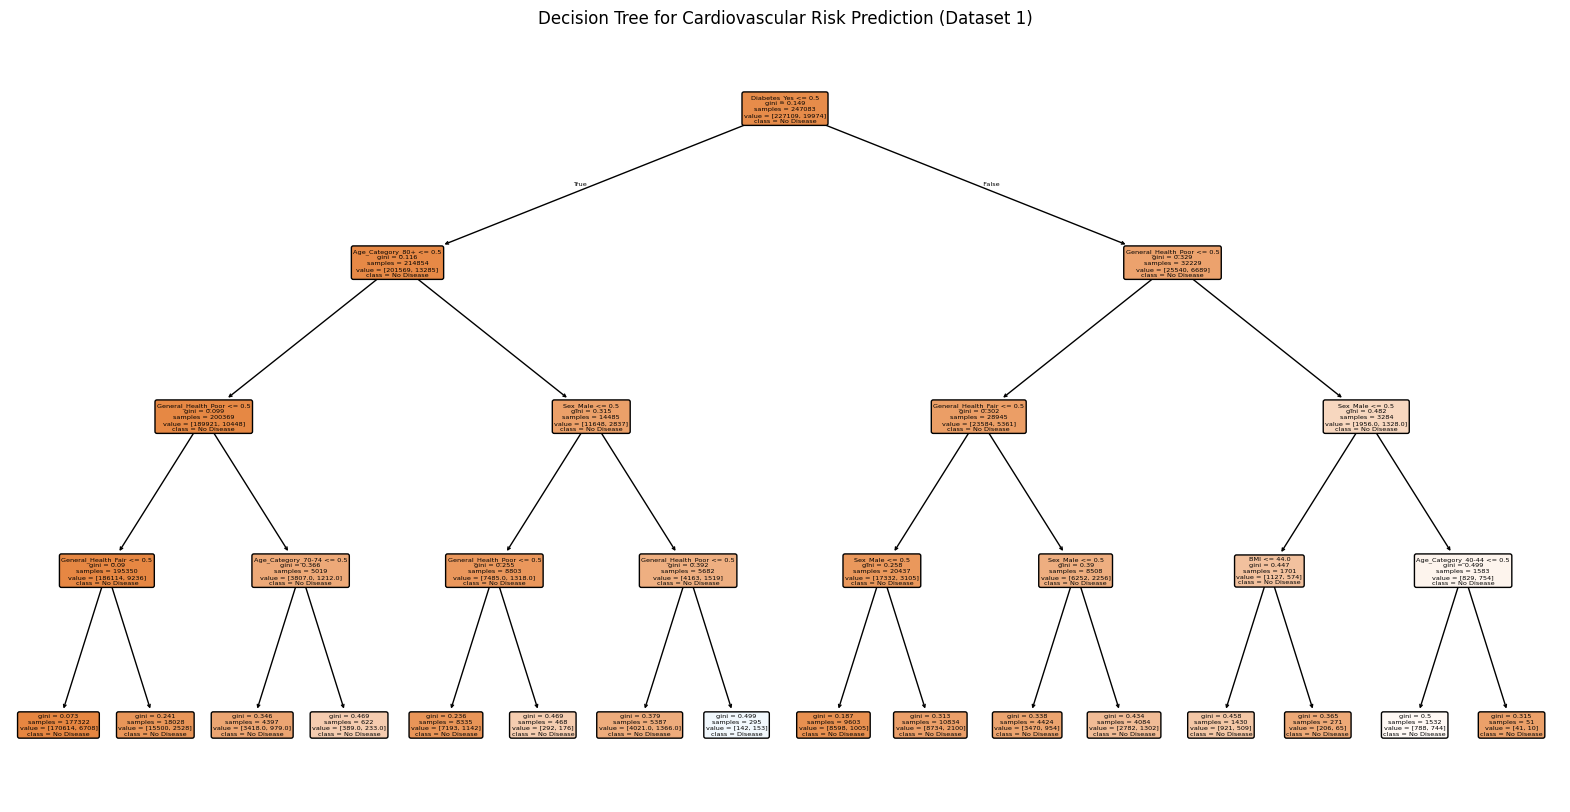


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.92      1.00      0.96     56774
     Disease       0.41      0.01      0.01      4997

    accuracy                           0.92     61771
   macro avg       0.67      0.50      0.48     61771
weighted avg       0.88      0.92      0.88     61771



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Split features and target
X = df.drop(columns=["Heart_Disease"])
y = df["Heart_Disease"]

# Convert categorical (non-numeric) features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Plot Tree
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    rounded=True
)
plt.title("Decision Tree for Cardiovascular Risk Prediction (Dataset 1)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))
